# TV Data Analysis

In [1]:
#importing dependencies and csv file
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import matplotlib.lines as mlines

filepath = os.path.join('Resources/TV data.csv')
TV_df = pd.read_csv(filepath, header=0)

filepath = os.path.join('Resources/TV data index.csv')
index_df = pd.read_csv(filepath, header=0) 

In [11]:
index_df.head()

,series,network,Type,# Eps,Air Day,National Time,daypart,Run_time (min),Unique HHs,Total Hrs Viewed,...,AirDay_Num,APV_linear,index_linear,APV_logarithm,Index_Logarith,APV_Daypart,Index_Daypart,APV_network,Index_network,Engagement index
0,series1317,network13,Broadcast,20,MTWRF,0.291667,earlymorning,120.0,14781161,1.155655e+07,...,5,32.296,1.085274,30.421180,1.152158,42.33,0.828018,50.73,0.690913,0.890363
1,series509,network5,Broadcast,20,MTWRF,0.291667,earlymorning,120.0,12743372,9.929613e+06,...,5,32.296,1.084964,30.421180,1.151829,42.33,0.827782,47.37,0.739709,0.906440
2,series831,network13,Broadcast,20,MTWRF,0.770833,earlyfringe,30.0,9944649,3.573048e+06,...,5,59.080,1.156567,60.697849,1.125740,46.72,1.462543,50.73,1.346935,1.311739
3,series1157,network4,Broadcast,20,MTWRF,0.291667,earlymorning,120.0,8792309,6.309503e+06,...,5,32.296,1.033255,30.421180,1.096933,42.33,0.788330,50.69,0.658315,0.847859
4,series58,network5,Broadcast,23,MTWRFS,0.770833,earlyfringe,30.0,8615800,2.998523e+06,...,6,59.080,1.120684,60.697849,1.090813,46.72,1.417166,47.37,1.397720,1.301900


## Network Performance based on Engagement Index

In [2]:
#Preparing dataset
indexNet = index_df[['series', 'network', 'Engagement index']]
indexNet_grp = indexNet.groupby(['network']).agg(['mean', 'sem'])
indexNet_grp.columns = indexNet_grp.columns.map('_'.join)
indexNet_grp = indexNet_grp.reset_index()
sorted_indexNet = indexNet_grp.sort_values('Engagement index_mean', ascending =False)
sorted_indexNet.head()

,network,Engagement index_mean,Engagement index_sem
64,network68,1.155264,NaN
25,network32,1.144435,0.006985
18,network26,1.119652,0.011709
49,network54,1.111193,0.022308
57,network61,1.105270,0.054625


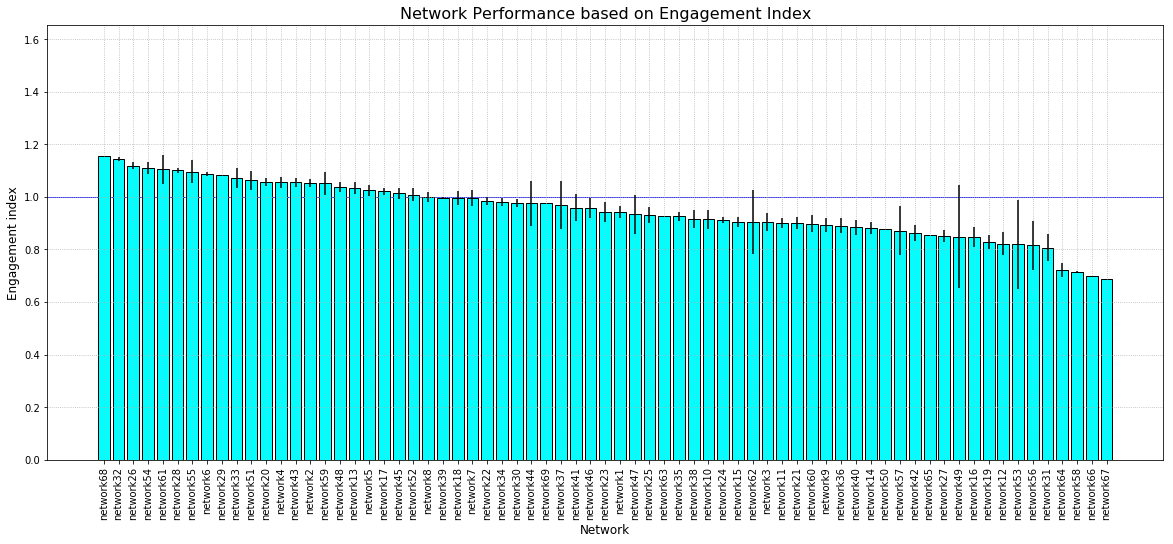


Better performing network is presented by all the bars the crossed blue dotted line



In [3]:
#Plotting network and engagement index
# data lists
network = sorted_indexNet['network'].tolist()
index_network = sorted_indexNet['Engagement index_mean'].tolist()
sem = sorted_indexNet['Engagement index_sem'].tolist()

# Bar chart
fig, ax = plt.subplots(figsize = (20, 8))
x_axis = np.arange(len(network))
ax.set_xticks(x_axis)
ax.set_xticklabels(network, rotation = 90)
plt.ylim(0, max(index_network)+0.5)
plt.axhline(y=1.0, linewidth=0.8, linestyle = '-', color='blue', alpha =2, zorder=0)

plt.grid(linestyle='dotted', zorder=0)

plt.xlabel('Network', fontsize=12)
plt.ylabel('Engagement index', fontsize=12)
plt.title ('Network Performance based on Engagement Index', fontsize=16)

ax.bar(x_axis, index_network, yerr = sem, color ='cyan', edgecolor ='k')

plt.show()

#Observations
print(f'''
Better performing network is presented by all the bars the crossed blue dotted line
''')



## Exploring Performance of Cable and Boardcast

In [4]:
#Preparing dataset
indexType_grp = index_df[['series', 'Type', 'Engagement index']]
indexType_grp = indexType_grp.groupby(['Type']).agg(['mean', 'sem'])
indexType_grp.columns = indexType_grp.columns.map('_'.join)
indexType_grp = indexType_grp.reset_index()
sorted_indexType = indexType_grp.sort_values('Engagement index_mean', ascending =False)
sorted_indexType.head()

,Type,Engagement index_mean,Engagement index_sem
0,Broadcast,1.030026,0.010925
1,Cable,0.992784,0.003732


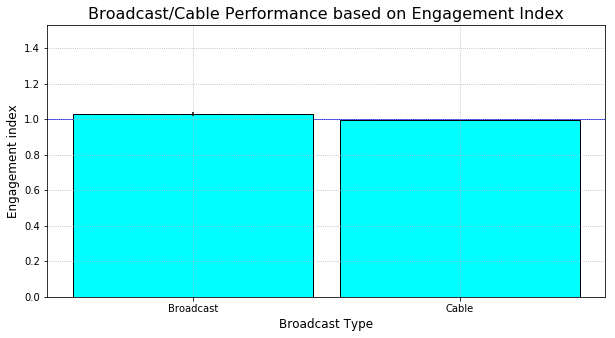


Broadcast is performing slightly better than the average while cable tv is below average



In [5]:
#Plotting network and engagement index
# data lists
Type = sorted_indexType['Type'].tolist()
index_Type = sorted_indexType['Engagement index_mean'].tolist()
sem = sorted_indexType['Engagement index_sem'].tolist()

# Bar chart
fig, ax = plt.subplots(figsize = (10, 5))
x_axis = np.arange(len(Type))
ax.set_xticks(x_axis)
ax.set_xticklabels(Type)
plt.ylim(0, max(index_Type)+0.5)

plt.grid(linestyle='dotted', zorder=0)

plt.xlabel('Broadcast Type', fontsize=12)
plt.ylabel('Engagement index', fontsize=12)
plt.title ('Broadcast/Cable Performance based on Engagement Index', fontsize=16)
plt.axhline(y=1.0, linewidth=0.8, linestyle = '-', color='blue', alpha =2, zorder=0)

ax.bar(x_axis, index_Type, width=0.9, yerr = sem, color ='cyan', edgecolor ='k')

plt.show()

#Observations
print(f'''
Broadcast is performing slightly better than the average while cable tv is below average
''')


## Which DayPart Consist of Better Viewer Engagement?

In [6]:
#Preparing dataset
indexDay_grp = index_df[['series', 'daypart', 'Engagement index']]
indexDay_grp = indexDay_grp.groupby(['daypart']).agg(['mean', 'sem'])
indexDay_grp.columns = indexDay_grp.columns.map('_'.join)
indexDay_grp = indexDay_grp.reset_index()
sorted_indexDay = indexDay_grp.sort_values('Engagement index_mean', ascending =False)
sorted_indexDay.head()

,daypart,Engagement index_mean,Engagement index_sem
4,overnight,1.139547,0.007059
3,latefringe,1.021469,0.009151
0,daytime,0.996442,0.008974
5,prime,0.966186,0.008561
1,earlyfringe,0.963417,0.009136


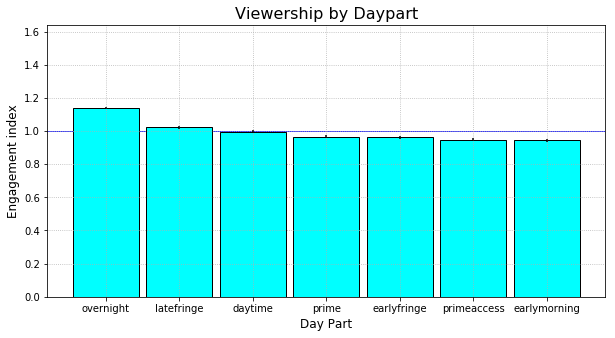


Seems unusual but Overnight and latefringe viewer seems to have better viewer engagement than other day-time period



In [7]:
#Plotting network and engagement index
# data lists
Daypart = sorted_indexDay['daypart'].tolist()
index_Day = sorted_indexDay['Engagement index_mean'].tolist()
sem = sorted_indexDay['Engagement index_sem'].tolist()

# Bar chart
fig, ax = plt.subplots(figsize = (10, 5))
x_axis = np.arange(len(Daypart))
ax.set_xticks(x_axis)
ax.set_xticklabels(Daypart)
plt.ylim(0, max(index_Day)+0.5)

plt.grid(linestyle='dotted', zorder=0)

plt.xlabel('Day Part', fontsize=12)
plt.ylabel('Engagement index', fontsize=12)
plt.title ('Viewership by Daypart', fontsize=16)
plt.axhline(y=1.0, linewidth=0.8, linestyle = '-', color='blue', alpha =2, zorder=0)

ax.bar(x_axis, index_Day, width=0.9, yerr = sem, color ='cyan', edgecolor ='k')

plt.show()

#Observations
print(f'''
Seems unusual but Overnight and latefringe viewer seems to have better viewer engagement than other day-time period
''')



## Unlike APV, Engagement Index is not Impacted by Run Time.

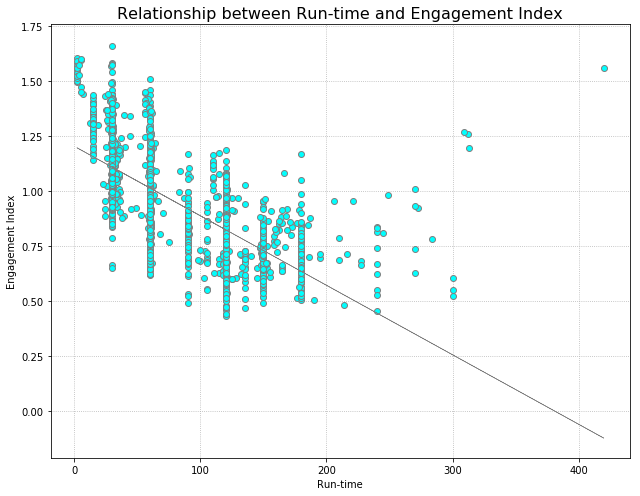


There is no relationship between Engagement Index and Run-time shown by r2_value = 0.4. 



In [12]:
# defining variables
x = index_df['Run_time (min)'].values.tolist()
y = index_df['Engagement index'].values.tolist()

# linear regression stats and fitline
slope, intercept, p_value, _, _ = stats.linregress(x,y)
fit = intercept + slope*(np.array(x))

# Scatter plot
fig, ax = plt.subplots(figsize = (9,7))
ax.scatter(x, y, color='cyan', edgecolor='grey', zorder=2)
plt.plot(x, fit, 'black', label='fitted line', linewidth=0.6, color='grey')
plt.grid(linestyle='dotted', zorder=0)


plt.xlabel('Run-time')
plt.ylabel('Engagement Index')
plt.title("Relationship between Run-time and Engagement Index", fontsize=16)

# Show the figure
plt.tight_layout()
plt.show()


#Observations
print(f'''
There is no relationship between Engagement Index and Run-time shown by r2_value = 0.4. 
''')


## Exploring Impacts of Network, Daypart, and Type on APV
This section was performed before the engagement index was developed. I examined impact of network, daypart, and Type on the APV to understand relationship between these variables and APV

In [9]:
# View data
TV_df.head()

,series,network,Type,# Eps,Air Day,National Time,daypart,Run_time (min),Unique HHs,Total Hrs Viewed,Avg % Viewed
0,series1317,network13,Broadcast,20,M T W R F,7:00 AM,earlymorning,120.0,"14,781,161",1.155655e+07,35.05%
1,series509,network5,Broadcast,20,M T W R F,7:00 AM,earlymorning,120.0,"12,743,372",9.929613e+06,35.04%
2,series831,network13,Broadcast,20,M T W R F,6:30 PM,earlyfringe,30.0,"9,944,649",3.573048e+06,68.33%
3,series1157,network4,Broadcast,20,M T W R F,7:00 AM,earlymorning,120.0,"8,792,309",6.309503e+06,33.37%
4,series58,network5,Broadcast,23,M T W R F S,6:30 PM,earlyfringe,30.0,"8,615,800",2.998523e+06,66.21%


In [10]:
#Converting strings to numerical value
TV_df['Total Hrs Viewed'] = TV_df['Total Hrs Viewed'].replace(['[\,]'], '', regex=True).astype(float)
TV_df['Avg % Viewed'] = TV_df['Avg % Viewed'].replace(['[\%]'], '', regex=True).astype(float)
TV_df['Air Day'] = TV_df['Air Day'].replace([' '], '', regex=True).astype(str)

In [11]:
TV_df['AirDay_Num'] = TV_df['Air Day'].str.len()
TV_df.to_csv('Clean_df.csv')

### Does Network Impacts Average % Viewed?

In [12]:
network_grouped = TV_df.groupby(['network']).agg(['mean', 'sem'])
network_grouped.columns = network_grouped.columns.map('_'.join)
network_grouped = network_grouped.reset_index()
sorted_network = network_grouped.sort_values('Avg % Viewed_mean', ascending =False)

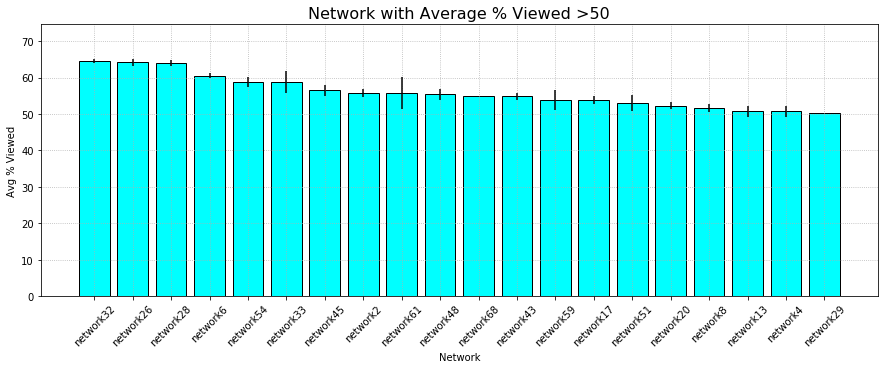


One-way ANOVA test with significant p-value (<.001) indicates network impacts APV. Network with more than 50 % APV was 
visualized. Mean comparison shows that network54 - network29 are not significantly different from each other. Network32, 26,
and 28 have highest APV. These networks are significantly different from network 48, 17,20, 8, 13 and 4



In [13]:
network_50 = sorted_network[sorted_network['Avg % Viewed_mean'] > 50]
# data lists
network = network_50['network'].tolist()
apv_network = network_50['Avg % Viewed_mean'].tolist()
sem = network_50['Avg % Viewed_sem'].tolist()

# Bar chart
fig, ax = plt.subplots(figsize = (15,5))
x_axis = np.arange(len(network))
ax.set_xticks(x_axis)
ax.set_xticklabels(network, rotation = 45)
plt.ylim(0, max(apv_network)+10.0)

plt.grid(linestyle='dotted', zorder=0)

plt.xlabel('Network')
plt.ylabel('Avg % Viewed')
plt.title ('Network with Average % Viewed >50', fontsize=16)

ax.bar(x_axis, apv_network, yerr = sem, color ='cyan', edgecolor ='k')

plt.show()

# Observations
print(f'''
One-way ANOVA test with significant p-value (<.001) indicates network impacts APV. Network with more than 50 % APV was 
visualized. Mean comparison shows that network54 - network29 are not significantly different from each other. Network32, 26,
and 28 have highest APV. These networks are significantly different from network 48, 17,20, 8, 13 and 4
''')


### Does Broadcast-type impacts Average % Viewed?

In [14]:
Type_grouped = TV_df.groupby(['Type']).agg(['mean', 'sem'])
Type_grouped.columns = Type_grouped.columns.map('_'.join)
Type_grouped = Type_grouped.reset_index()
sorted_Type = Type_grouped.sort_values('Avg % Viewed_mean', ascending =False)

In [15]:
# Ttest Broadcast and Cable
Broadcast = TV_df.loc[(TV_df['Type']=='Broadcast')]['Avg % Viewed']
Cable = TV_df.loc[(TV_df['Type']=='Cable')]['Avg % Viewed']

stats.ttest_ind(Broadcast, Cable, equal_var=False)

Ttest_indResult(statistic=-0.12948700088140647, pvalue=0.897023151239106)

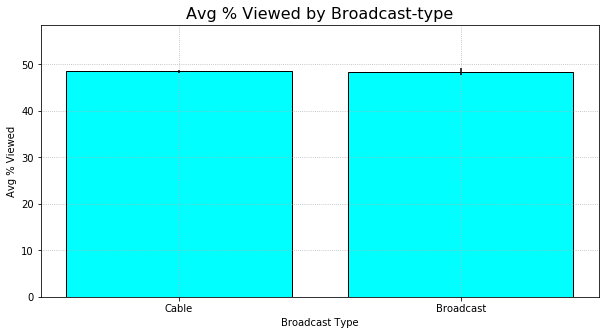


There was no significant impact of broadcast-type on APV (pvalue= 0.89).



In [16]:
# data lists
Type = sorted_Type['Type'].tolist()
apv_Type = sorted_Type['Avg % Viewed_mean'].tolist()
sem = sorted_Type['Avg % Viewed_sem'].tolist()

# Bar chart
fig, ax = plt.subplots(figsize = (10,5))
x_axis = np.arange(len(Type))
ax.set_xticks(x_axis)
ax.set_xticklabels(Type)
plt.ylim(0, max(apv_Type)+10.0)

plt.grid(linestyle='dotted', zorder=0)

plt.xlabel('Broadcast Type')
plt.ylabel('Avg % Viewed')
plt.title ('Avg % Viewed by Broadcast-type', fontsize=16)

ax.bar(x_axis, apv_Type, width = 0.8, yerr = sem, color ='cyan', edgecolor ='k')

plt.show()

# Observations
print(f'''
There was no significant impact of broadcast-type on APV (pvalue= 0.89).
''')

### Does Daypart impacts Average % Viewed?

In [17]:
daypart_grouped = TV_df.groupby(['daypart']).agg(['mean', 'sem'])
daypart_grouped.columns = daypart_grouped.columns.map('_'.join)
daypart_grouped = daypart_grouped.reset_index()
sorted_daypart = daypart_grouped.sort_values('Avg % Viewed_mean', ascending =False)

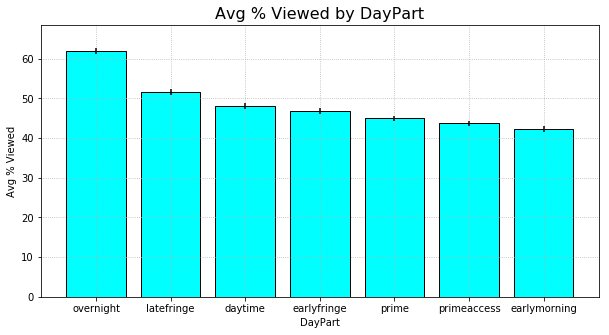


DayPart significantly impacted APV(pvalue=<0.0001). APV was significantly higher during overnight period while earlymorning
has the lowest APV.



In [18]:
# data lists
daypart = sorted_daypart['daypart'].tolist()
apv_daypart = sorted_daypart['Avg % Viewed_mean'].tolist()
sem = sorted_daypart['Avg % Viewed_sem'].tolist()

# Bar chart
fig, ax = plt.subplots(figsize = (10,5))
x_axis = np.arange(len(daypart))
ax.set_xticks(x_axis)
ax.set_xticklabels(daypart)
plt.ylim(0, max(apv_Type)+20.0)

plt.grid(linestyle='dotted', zorder=0)

plt.xlabel('DayPart')
plt.ylabel('Avg % Viewed')
plt.title ('Avg % Viewed by DayPart', fontsize=16)

ax.bar(x_axis, apv_daypart, width = 0.8, yerr = sem, color ='cyan', edgecolor ='k')

plt.show()

# Observations
print(f'''
DayPart significantly impacted APV(pvalue=<0.0001). APV was significantly higher during overnight period while earlymorning
has the lowest APV.
''')